### 全体のコード
Irisを分類するためのコードを実装します。

### ミニバッチ法の実装
今回はミニバッチ法を用いるので、バッチごとに重みとバイアスを更新する。  
以下はミニバッチ法による学習の実装です。

In [ ]:
# -- 学習と経過の記録　--
n_batch = n_train // batch_size # 1エポックあたりのバッチ数

for i in range(epoch):
    
    …
    
    # -- 学習 --
    index_random = np.arange(n_train)
    np.random.shuffle(index_random) # インデックスをシャッフルする
    
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        back_propagation(t)
        
        # 重みとバイアスの更新
        update_wb()

コードではまず、`n_train`を`batch_size`で割ることで1エポックあたりのバッチ数を求めています。  
学習に使うバッチ数が整数なので、端数として学習に使われないデータも存在することになりますが、少数でありバッチはエポックごとにランダムに選択されるので、今回はこれを無視します。  
  
 訓練データのサンプル数分だけインデックスを作成して`index_random`とし、これをシャッフルします。  
そして、ループの中でこれからバッチサイズ分だけランダムなインデックスを取り出し、`mb_index`とします。  
`input_train`と`correct_train`は行列ですが、これらからインデックスが`mb_index`の列を抜き出してミニバッチとします。  
このミニバッチを使用して順伝播と逆伝播の計算を行い、重みとバイアスを更新します。

### 正解率の測定
学習の結果、訓練データのうち何%を正しく品種分類できるようになったのか、テストデータのうち何%を正しく品種分類できるようになったのかは学習の成否を判断するために重要です

In [ ]:
# -- 正解率の測定 --
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(conut_train/n_train*100) + "%",
          "Accuracy Test:", str(count_test/n_test*100) + "%")

コードでは、全訓練データとテストデータに対してそれぞれ順伝播の計算をした後、それぞれ正解数をカウントします。  
正解数のカウントにはNumpyのargmax関数を用いますが、argmaxは最大値のインデックスを返します。  
  
 順伝播により得られた出力は(バッチサイズ)x(出力層のニューロン数)の行列になりますが、argmax関数で、各行のうち最大のもののインデックスを以下の箇所で取得します。  

In [ ]:
np.argmax(output_layer.y, axis=1)

取得したインデックスは、例えば以下のような一次元配列行列になります。  

[1 0 2 ・・・（中略）・・・2]

また、正解も(バッチサイズ)x(出力層のニューロン数)の行列になりますが、各行がone-hot表現になっています。  
以下の箇所では、argmax関数で各行のうち最大のもの、すなわち値が1の要素のインデックスを取得します。

In [ ]:
np.argmax(correct_train, axis=1)

取得したインデックスは、例えば以下のような一次元配列になります。

[1 0 1 ・・・（中略）・・・2]

これら2つの行列の各要素が一致すれば、比較演算子`==`はTrueを返し、一致しなければFalseを返します。  
結果として、サンプルごとの正解と不正解がTrueとFalseで表される以下のような配列ができます。

[True True False ・・・（中略）・・・True]

Pythonでは、Trueを1、Falseを0とみなすことができるので、Numpyのsum関数にこの配列を入れることで正解数をカウントすることができます。  
コードでは、この正解数をサンプル数で割って100をかけることにより正解率としています。  

### ディープラーニングのコード
ディープラーニングのコード全体は以下の通りです。  
実行すると、ディープニューラルネットワークがIrisの特徴を学習します。  
  
 学習中、1エポックごとに訓練データの誤差（訓練誤差）とテストデータ誤差（テスト誤差）がそれぞれ測定、記録されます。  
学習終了後に、誤差の変動を表すグラフと正解率が表示される。

Epoch:0/100 Error_train:1.1108512814653564 Error_test:1.1089650072699537
Epoch:20/100 Error_train:0.25515639663383355 Error_test:0.25393094026107654
Epoch:40/100 Error_train:0.07560017392614267 Error_test:0.08784023560244593
Epoch:60/100 Error_train:0.04892851783496089 Error_test:0.0902509566924768
Epoch:80/100 Error_train:0.03452431683581224 Error_test:0.0661543110268494


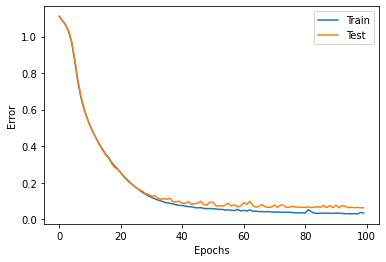

Accuracy Train: 100.0% Accuracy Test: 97.33333333333334%


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# -- Irisデータの読み込み --
iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target
n_data = len(correct) # サンプル数

# -- 入力データを標準化する　--
ave_input = np.average(input_data, axis=0)
std_input = np.std(input_data, axis=0)
input_data = (input_data -ave_input) / std_input

# -- 正解をone-hot表現にする --
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0
    
# -- 訓練データとテストデータ
index = np.arange(n_data)
# こんな分け方でいいんだ
index_train = index[index%2 == 0]
index_test = index[index%2 != 0]

# これで分けられるのすごい
input_train = input_data[index_train, :] # 訓練　入力
correct_train = correct_data[index_train, :] # 訓練　正解
input_test = input_data[index_test, :] # テスト　入力
correct_test = correct_data[index_test, :] # テスト　正解

n_train = input_train.shape[0] # 訓練データのサンプル数
n_test = input_test.shape[0] # テストデータのサンプル数

# -- 各設定値 --
n_in = 4 # 入力層のニューロン数
n_mid = 25 # 中間層のニューロン数
n_out = 3 # 出力層のニューロン数

wb_width = 0.1 # 重みとバイアスの広がり具合
eta = 0.01 # 学習係数
epoch = 100
batch_size = 8
interval = 20 # 経過の表示間隔

# -- 各層の継承元 --
class BaseLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n) # 重み（行列）
        self.b = wb_width * np.random.randn(n) # バイアス（ベクトル）
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# -- 中間層 --
class MiddleLayer(BaseLayer):
    # 順伝播
    def forward(self, x):
        self.x = x
        self.u = np.dot(x, self.w) + self.b
        self.y = np.where(self.u <= 0, 0, self.u) # ReLU
        
    # 逆伝播
    def backward(self, grad_y):
        delta = grad_y * np.where(self.u <= 0, 0, 1) # ReLU
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
# -- 出力層 -- 
class OutputLayer(BaseLayer):
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        # ソフトマックス関数
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
# -- 各層の初期化 --
middle_layer_1 = MiddleLayer(n_in, n_mid)
middle_layer_2 = MiddleLayer(n_mid, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 順伝播 --
def forward_propagation(x):
    middle_layer_1.forward(x)
    middle_layer_2.forward(middle_layer_1.y)
    output_layer.forward(middle_layer_2.y)
    
# -- 逆伝播　--
def back_propagation(t):
    output_layer.backward(t)
    middle_layer_2.backward(output_layer.grad_x)
    middle_layer_1.backward(middle_layer_2.grad_x)
    
# -- 重みとバイアスの更新 --
def update_wb():
    middle_layer_1.update(eta)
    middle_layer_2.update(eta)
    output_layer.update(eta)
    
# -- 誤差を計算 --
def get_error(t, batch_size):
    # 交差エントロピー
    return -np.sum(t * np.log(output_layer.y + 1e-7)) / batch_size

# --　誤差の記録用 --
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

# -- 学習と経過の記録 --
n_batch = n_train // batch_size # 1エポックあたりのバッチ数

for i in range(epoch):
    
    # -- 誤差の計測 --
    forward_propagation(input_train)
    error_train = get_error(correct_train, n_train)
    forward_propagation(input_test)
    error_test = get_error(correct_test, n_test)
    
    # -- 誤差の記録 --
    test_error_x.append(i)
    test_error_y.append(error_test)
    train_error_x.append(i)
    train_error_y.append(error_train)
    
    # -- 経過の表示 --
    if i%interval == 0:
        print("Epoch:" + str(i) + "/" + str(epoch),
                  "Error_train:" + str(error_train),
                   "Error_test:" + str(error_test))
        
    # -- 学習 --
    index_random = np.arange(n_train)
    np.random.shuffle(index_random) # インデックスをシャッフルする
    for j in range(n_batch):
        
        # ミニバッチを取り出す
        mb_index = index_random[j*batch_size : (j+1)*batch_size]
        x = input_train[mb_index, :]
        t = correct_train[mb_index, :]
        
        # 順伝播と逆伝播
        forward_propagation(x)
        back_propagation(t)
        
        # 重みとバイアスの更新
        update_wb()
        
# -- 誤差の記録をグラフ表示 --
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

# -- 正解率の測定 --
forward_propagation(input_train)
count_train = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_train, axis=1))

forward_propagation(input_test)
count_test = np.sum(np.argmax(output_layer.y, axis=1) == np.argmax(correct_test, axis=1))

print("Accuracy Train:", str(count_train/n_train*100) + "%",
          "Accuracy Test:", str(count_test/n_test*100) + "%")


epoch数を重ねると、訓練誤差、テスト誤差、共に揺らぎながらもきれいに減少して0に近づきます。  
また、訓練データだけではなくテストデータでも高い正解率が得られました。